#### А.А. Татур
#### v.01
#### 22.11.2022

#### Цели:
1. Обработка и очистка данных
2. Поиск зависимостей
3. Построение моделей регрессии
4. Сравнить их эффективность используя различные метрики

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from catboost import CatBoostRegressor

In [5]:
# Открываем файл с данными
df = pd.read_csv('Walmart.csv')

#### Показатели, использованные в наборе
01. Store - the store number
02. Date - the week of sales
03. Weekly_Sales - sales for the given store
04. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
05. Temperature - Temperature on the day of sale
06. Fuel_Price - Cost of fuel in the region
07. CPI – Prevailing consumer price index
09. Unemployment - Prevailing unemployment rate
10. Holiday Events: 
    - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
    - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
    - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [8]:
df.Date = df.Date.astype("datetime64[ns]")

In [9]:
#### Обрабаываем колонку с датами, вытягиваем из нее различные показатели. Исходную колонку удаляем
df = pd.concat([df, df.Date.dt.isocalendar()], axis=1)
df.rename(columns={'day':'day_of_week'}, inplace = True)
df['day_of_year']=df.Date.dt.day_of_year
df['quarter'] = df.Date.dt.quarter
df.drop('Date', axis=1, inplace=True)

In [10]:
df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,day_of_week,day_of_year,quarter
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,17,7,122,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,48,4,336,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,7,5,50,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,8,5,57,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,18,1,123,2


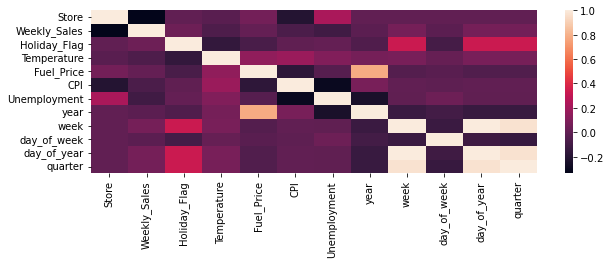

In [16]:
# Строим корелляционную матрицу.
plt.figure(figsize=(10,3))
sns.heatmap(df.corr());

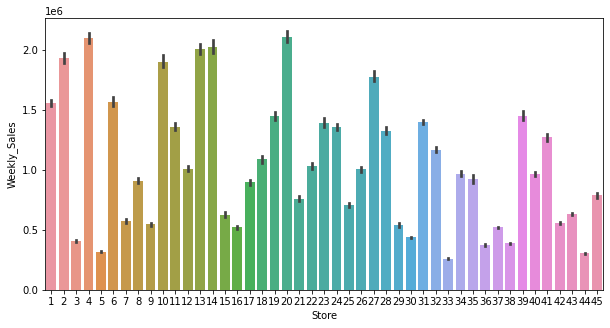

In [17]:
# Визуализируем зависимость объема продаж от номера магазина
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Store', y='Weekly_Sales');

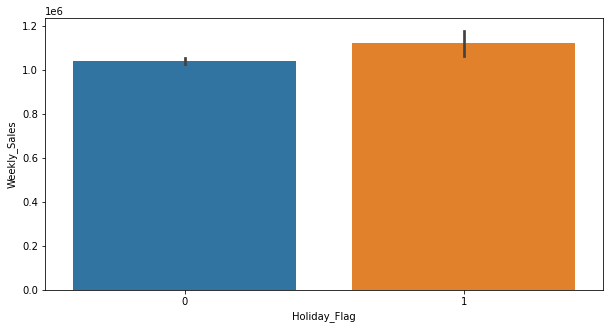

In [19]:
# Визуализируем зависимость объема продаж от флага "Праздничный день"
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Holiday_Flag', y='Weekly_Sales');

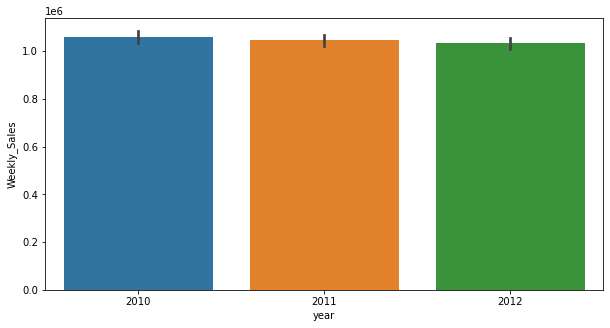

In [21]:
# Визуализируем зависимость объема продаж от флага "Год"
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='year', y='Weekly_Sales');

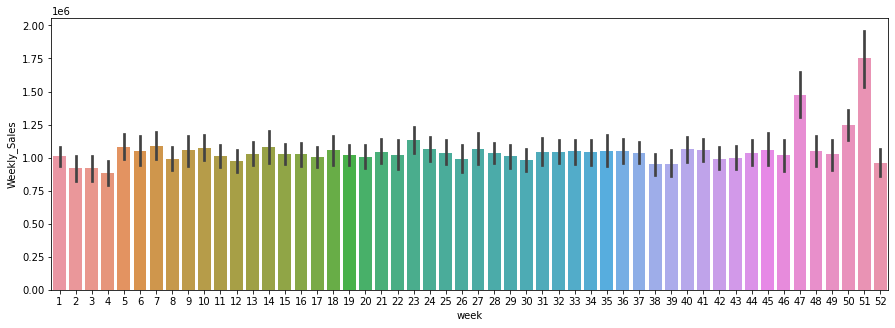

In [75]:
# Визуализируем зависимость объема продаж от флага "Номер недели с начала года"
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='week', y='Weekly_Sales');

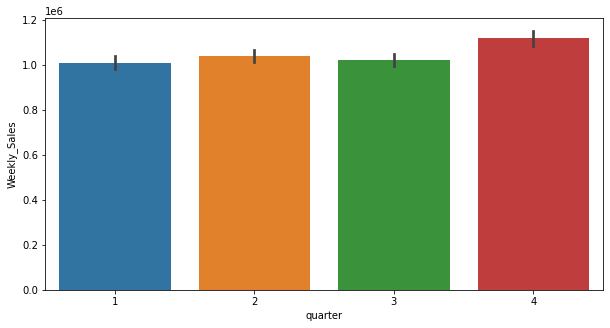

In [24]:
# Визуализируем зависимость объема продаж от флага "Номер квартала"
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='quarter', y='Weekly_Sales');

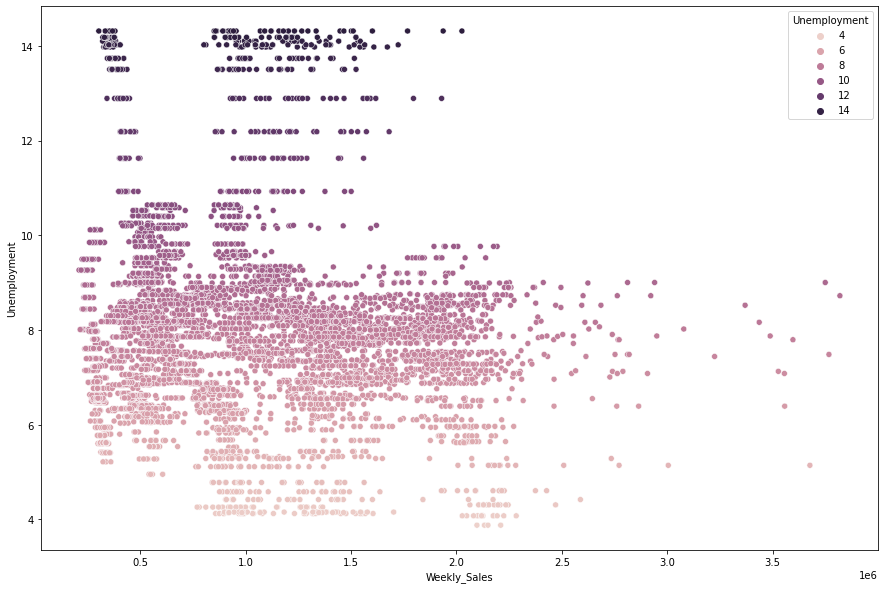

In [82]:
# Визуализируем зависимость объема продаж от уровня безработицы
plt.figure (figsize=(15,10))
sns.scatterplot(data=df, x='Weekly_Sales', y='Unemployment', hue = 'Unemployment');

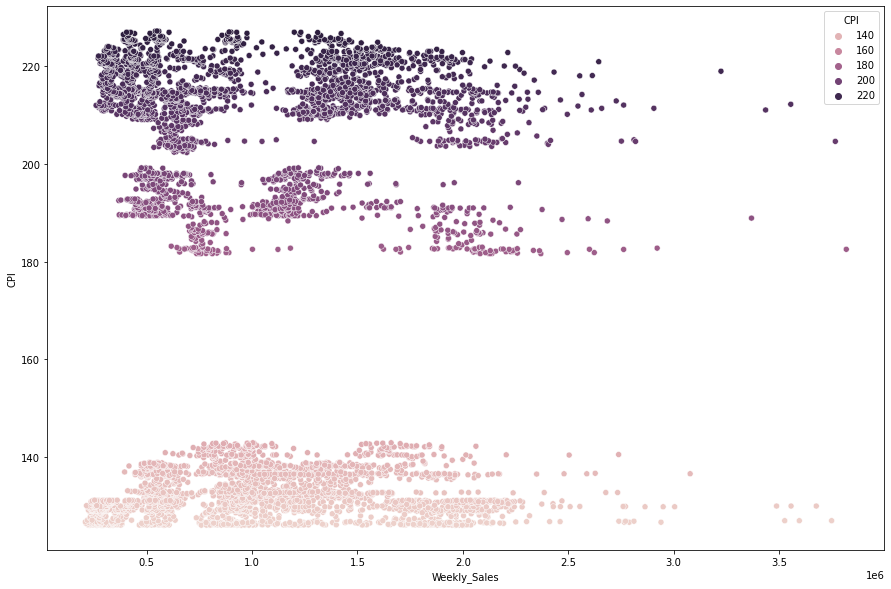

In [79]:
# Визуализируем зависимость объема продаж от CPI
plt.figure (figsize=(15,10))
sns.scatterplot(data=df, x='Weekly_Sales', y='CPI', hue='CPI');

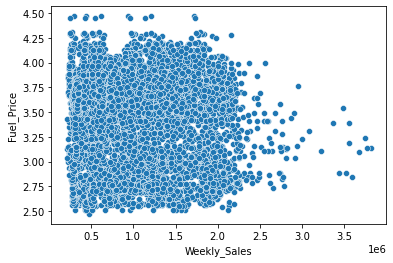

In [29]:
# Визуализируем зависимость объема продаж от цены на топливо
sns.scatterplot(data=df, x='Weekly_Sales', y='Fuel_Price');

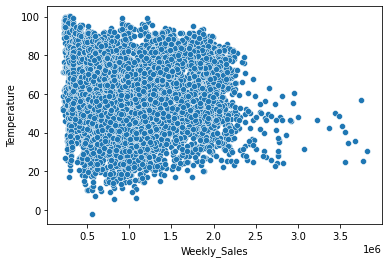

In [30]:
# Визуализируем зависимость объема продаж от уровня температуры
sns.scatterplot(data=df, x='Weekly_Sales', y='Temperature');

In [65]:
# Функция, которая принимает на вход модель и целевые параметры X,y на выходе печатает результат
# проверки различных метрик, а также возвращает pd.DataFrame с ними.
def measurement(model, X:pd.DataFrame,y:pd.Series) -> pd.DataFrame:
    name=model.__name__
    model=model()
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, train_size=0.4)
    model.fit (X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print ('Model results:\n\
            Mean Absolute Error (MAE) = {}\n\
            Mean Square Error (MSE) = {}\n\
            Root Mean Square Error (RMSE) = {}\n\
            Coefficient of determination (R2 score) = {}'.format(mae, mse, rmse, r2))
    return pd.DataFrame(data = {'Model_Name':[name],
                        'MAE':[mae],
                        'MSE':[mse],
                        'RMSE':[rmse],
                        'R2':[r2]})

In [35]:
X=df.drop('Weekly_Sales', axis=1)
y=df['Weekly_Sales']

##### Оценка различных моделей

In [66]:
dtr_data = measurement (DecisionTreeRegressor,X,y)

Model results:
            Mean Absolute Error (MAE) = 88997.93777000777
            Mean Square Error (MSE) = 25837032184.8083
            Root Mean Square Error (RMSE) = 160739.01886227968
            Coefficient of determination (R2 score) = 0.9190823569307652


In [181]:
rfr_data = measurement (RandomForestRegressor, X, y)

Model results:
            Mean Absolute Error (MAE) = 72218.98431085213
            Mean Square Error (MSE) = 15443426416.80579
            Root Mean Square Error (RMSE) = 124271.5833036893
            Coefficient of determination (R2 score) = 0.9516335445331894


In [182]:
lir_data = measurement(LinearRegression, X, y)

Model results:
            Mean Absolute Error (MAE) = 436081.37823310634
            Mean Square Error (MSE) = 273484953603.01056
            Root Mean Square Error (RMSE) = 522957.88893849816
            Coefficient of determination (R2 score) = 0.14348684856047345


In [183]:
lasso_data = measurement(linear_model.Lasso, X, y)

Model results:
            Mean Absolute Error (MAE) = 436080.88225559803
            Mean Square Error (MSE) = 273484084510.9679
            Root Mean Square Error (RMSE) = 522957.0579989985
            Coefficient of determination (R2 score) = 0.1434895704241611


In [184]:
knn_data = measurement (KNeighborsRegressor, X,y)

Model results:
            Mean Absolute Error (MAE) = 413067.2024775965
            Mean Square Error (MSE) = 264648361545.4276
            Root Mean Square Error (RMSE) = 514439.85221348045
            Coefficient of determination (R2 score) = 0.1711617067620419


In [185]:
svr_data = measurement(SVR, X,y)

Model results:
            Mean Absolute Error (MAE) = 468368.47396124894
            Mean Square Error (MSE) = 325698230860.16345
            Root Mean Square Error (RMSE) = 570699.772963126
            Coefficient of determination (R2 score) = -0.020037170078691213


In [123]:
gpr_data = measurement(GaussianProcessRegressor, X,y)

Model results:
            Mean Absolute Error (MAE) = 1020813.8955027796
            Mean Square Error (MSE) = 1363677267702.0227
            Root Mean Square Error (RMSE) = 1167765.930185507
            Coefficient of determination (R2 score) = -3.270829157941086


In [171]:
cbr_data = measurement(CatBoostRegressor, X,y)

Learning rate set to 0.04754
0:	learn: 553624.0727852	total: 4.36ms	remaining: 4.35s
1:	learn: 545117.1645097	total: 9.76ms	remaining: 4.87s
2:	learn: 535879.4554268	total: 12.1ms	remaining: 4.02s
3:	learn: 526187.5740562	total: 14.3ms	remaining: 3.56s
4:	learn: 520413.8587562	total: 16.3ms	remaining: 3.24s
5:	learn: 510305.8005879	total: 18.1ms	remaining: 3s
6:	learn: 502012.6761686	total: 20.1ms	remaining: 2.85s
7:	learn: 494765.2796558	total: 22.6ms	remaining: 2.8s
8:	learn: 489628.4373840	total: 24.4ms	remaining: 2.68s
9:	learn: 482104.9041400	total: 26.4ms	remaining: 2.62s
10:	learn: 477992.0178077	total: 28.3ms	remaining: 2.54s
11:	learn: 469442.2843186	total: 30ms	remaining: 2.47s
12:	learn: 464062.9631689	total: 32.1ms	remaining: 2.43s
13:	learn: 460610.0360664	total: 34ms	remaining: 2.39s
14:	learn: 456342.8948100	total: 36.1ms	remaining: 2.37s
15:	learn: 448479.0338906	total: 38.1ms	remaining: 2.34s
16:	learn: 442657.5393101	total: 39.9ms	remaining: 2.31s
17:	learn: 439185.16

187:	learn: 164076.7241395	total: 342ms	remaining: 1.48s
188:	learn: 163512.0278775	total: 344ms	remaining: 1.48s
189:	learn: 162787.2031755	total: 347ms	remaining: 1.48s
190:	learn: 162028.9715686	total: 349ms	remaining: 1.48s
191:	learn: 161525.5340935	total: 351ms	remaining: 1.48s
192:	learn: 160622.3933209	total: 353ms	remaining: 1.48s
193:	learn: 159734.8357906	total: 355ms	remaining: 1.47s
194:	learn: 159163.6971810	total: 357ms	remaining: 1.47s
195:	learn: 158590.6764564	total: 359ms	remaining: 1.47s
196:	learn: 157881.5943002	total: 362ms	remaining: 1.48s
197:	learn: 157174.5880077	total: 365ms	remaining: 1.48s
198:	learn: 156676.6338526	total: 368ms	remaining: 1.48s
199:	learn: 155897.2476909	total: 370ms	remaining: 1.48s
200:	learn: 155207.0734994	total: 372ms	remaining: 1.48s
201:	learn: 154652.9355016	total: 374ms	remaining: 1.48s
202:	learn: 154432.7188835	total: 377ms	remaining: 1.48s
203:	learn: 154022.8674453	total: 380ms	remaining: 1.48s
204:	learn: 153328.6101973	tota

378:	learn: 97271.5613581	total: 688ms	remaining: 1.13s
379:	learn: 97063.4159252	total: 690ms	remaining: 1.13s
380:	learn: 96897.0074765	total: 692ms	remaining: 1.12s
381:	learn: 96714.4073566	total: 694ms	remaining: 1.12s
382:	learn: 96615.1752946	total: 696ms	remaining: 1.12s
383:	learn: 96366.3506655	total: 699ms	remaining: 1.12s
384:	learn: 96255.3881327	total: 701ms	remaining: 1.12s
385:	learn: 96064.8202674	total: 704ms	remaining: 1.12s
386:	learn: 95826.4990433	total: 706ms	remaining: 1.12s
387:	learn: 95697.5937811	total: 708ms	remaining: 1.12s
388:	learn: 95576.0036580	total: 710ms	remaining: 1.11s
389:	learn: 95386.3952957	total: 711ms	remaining: 1.11s
390:	learn: 95254.9017260	total: 713ms	remaining: 1.11s
391:	learn: 95147.2820753	total: 715ms	remaining: 1.11s
392:	learn: 95030.2149700	total: 717ms	remaining: 1.11s
393:	learn: 94909.0522753	total: 719ms	remaining: 1.1s
394:	learn: 94764.9898736	total: 721ms	remaining: 1.1s
395:	learn: 94562.5707382	total: 722ms	remaining: 

566:	learn: 75853.6627715	total: 1.03s	remaining: 791ms
567:	learn: 75754.1407898	total: 1.04s	remaining: 789ms
568:	learn: 75673.3076853	total: 1.04s	remaining: 787ms
569:	learn: 75603.2847081	total: 1.04s	remaining: 786ms
570:	learn: 75520.9400425	total: 1.04s	remaining: 784ms
571:	learn: 75396.2835835	total: 1.05s	remaining: 783ms
572:	learn: 75304.6721872	total: 1.05s	remaining: 782ms
573:	learn: 75247.1810461	total: 1.05s	remaining: 780ms
574:	learn: 75169.8187800	total: 1.05s	remaining: 778ms
575:	learn: 75093.6762547	total: 1.05s	remaining: 777ms
576:	learn: 74972.4311575	total: 1.06s	remaining: 775ms
577:	learn: 74889.5629257	total: 1.06s	remaining: 773ms
578:	learn: 74817.4713989	total: 1.06s	remaining: 771ms
579:	learn: 74753.0063107	total: 1.06s	remaining: 769ms
580:	learn: 74685.2713847	total: 1.06s	remaining: 768ms
581:	learn: 74608.7469085	total: 1.07s	remaining: 766ms
582:	learn: 74558.0116468	total: 1.07s	remaining: 765ms
583:	learn: 74483.0170591	total: 1.07s	remaining

721:	learn: 66310.7761309	total: 1.38s	remaining: 530ms
722:	learn: 66246.0370783	total: 1.38s	remaining: 528ms
723:	learn: 66211.6704619	total: 1.38s	remaining: 526ms
724:	learn: 66159.4796686	total: 1.38s	remaining: 524ms
725:	learn: 66092.9098835	total: 1.38s	remaining: 522ms
726:	learn: 66029.5179830	total: 1.39s	remaining: 521ms
727:	learn: 65992.2440575	total: 1.39s	remaining: 519ms
728:	learn: 65928.8057081	total: 1.39s	remaining: 518ms
729:	learn: 65866.4414886	total: 1.4s	remaining: 516ms
730:	learn: 65792.0253118	total: 1.4s	remaining: 514ms
731:	learn: 65749.3810170	total: 1.4s	remaining: 513ms
732:	learn: 65710.3718091	total: 1.4s	remaining: 511ms
733:	learn: 65644.0599932	total: 1.4s	remaining: 509ms
734:	learn: 65575.4155621	total: 1.41s	remaining: 507ms
735:	learn: 65522.7673967	total: 1.41s	remaining: 505ms
736:	learn: 65473.9650939	total: 1.41s	remaining: 503ms
737:	learn: 65456.5943519	total: 1.41s	remaining: 501ms
738:	learn: 65389.8332625	total: 1.41s	remaining: 499

879:	learn: 59064.3596425	total: 1.72s	remaining: 234ms
880:	learn: 59025.0558460	total: 1.72s	remaining: 233ms
881:	learn: 59001.2402756	total: 1.72s	remaining: 231ms
882:	learn: 58934.5111602	total: 1.73s	remaining: 229ms
883:	learn: 58884.3508154	total: 1.73s	remaining: 227ms
884:	learn: 58849.9705894	total: 1.73s	remaining: 225ms
885:	learn: 58811.1692098	total: 1.73s	remaining: 223ms
886:	learn: 58759.2250585	total: 1.74s	remaining: 221ms
887:	learn: 58728.7084364	total: 1.74s	remaining: 219ms
888:	learn: 58693.5878696	total: 1.74s	remaining: 217ms
889:	learn: 58670.8721528	total: 1.74s	remaining: 215ms
890:	learn: 58634.2318226	total: 1.74s	remaining: 213ms
891:	learn: 58608.5288315	total: 1.75s	remaining: 211ms
892:	learn: 58587.3768791	total: 1.75s	remaining: 209ms
893:	learn: 58555.5634641	total: 1.75s	remaining: 207ms
894:	learn: 58501.3649105	total: 1.75s	remaining: 205ms
895:	learn: 58476.5673712	total: 1.75s	remaining: 204ms
896:	learn: 58452.0547531	total: 1.75s	remaining

In [192]:
summary = pd.concat([dtr_data, rfr_data, lir_data,lasso_data,  knn_data, svr_data, gpr_data, cbr_data], 
                    axis=0).set_index('Model_Name')

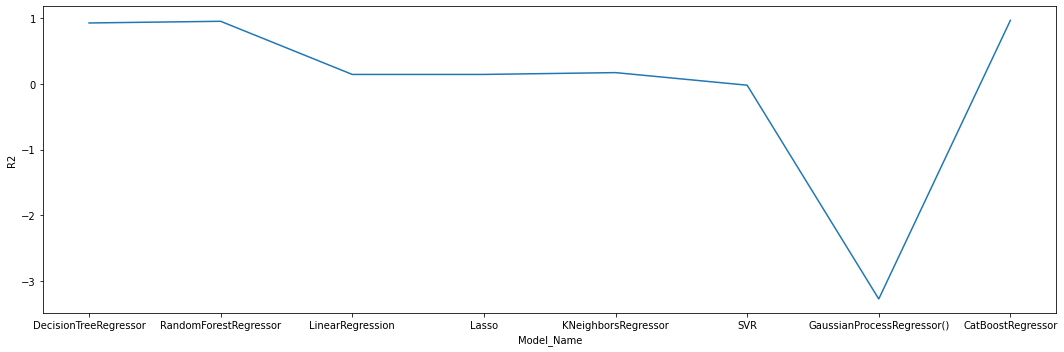

In [214]:
plt.figure(figsize = (15,5))
sns.lineplot(data=summary, x=summary.index, y='R2');

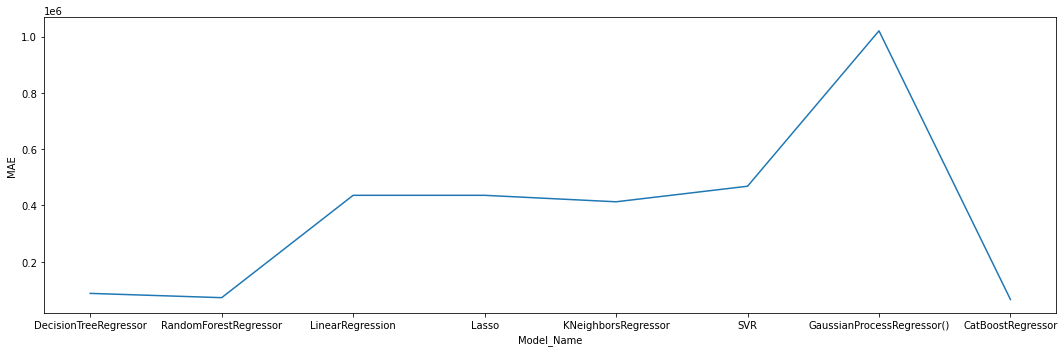

In [215]:
plt.figure(figsize = (15,5))
sns.lineplot(data=summary, x=summary.index, y='MAE');

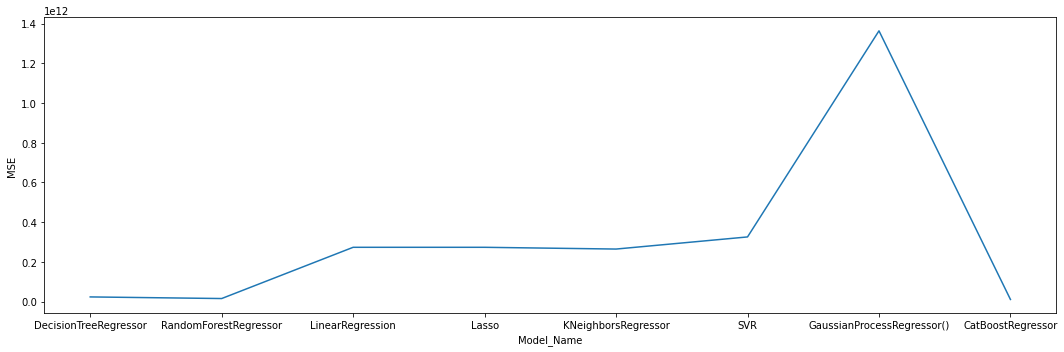

In [216]:
plt.figure(figsize = (15,5))
sns.lineplot(data=summary, x=summary.index, y='MSE');

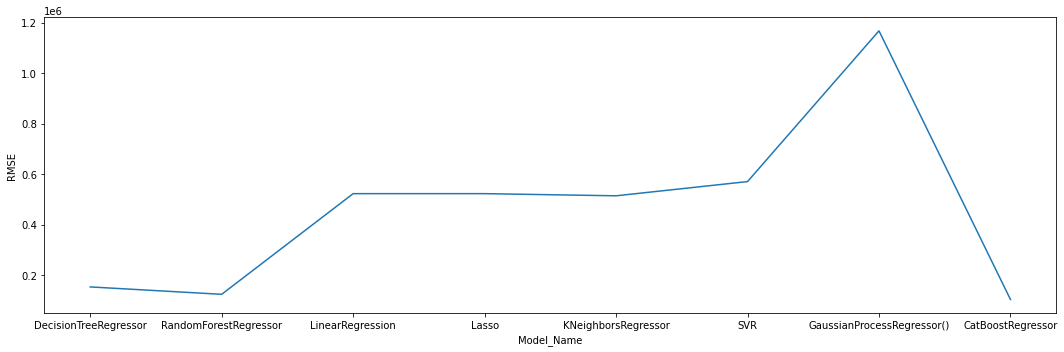

In [217]:
plt.figure(figsize = (15,5))
sns.lineplot(data=summary, x=summary.index, y='RMSE');

##### Выделение наиболее значимых признаков для наиболее успешной модели (CatBoostRegressor)

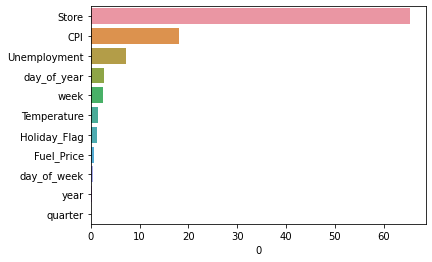

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, train_size=0.4)
model = CatBoostRegressor(verbose=False)
model.fit (X_train, y_train);
feature_importance = pd.DataFrame (model.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
sns.barplot(data=feature_importance, x=0, y=feature_importance.index);

##### Выводы
1. В результате графического анализа можно заключить, что:
    - Объемы продаж очень сильно отличаются между разными магазинами, что, вероятно, обусловлено их разными размерами
    - Объемы продаж резко возрастают на 47 и 51 неделях (предпраздничные), хотя непосредственно флаг Holidays_Flag особо на объем продаж не влияет
    - Графически можно определить, что количество продаж сильно подвержен показателю CPI и Unemployment. Причем, что интересно, низкие объемы продаж как при высокой, так и при очень низкой безработице.

2. Наилучшие результаты демонстрируют DeicisionTreeRegressor, RandomForestRegressor и CatBootRegressor.

3. При анализе наиболее значимых параметров модели подтверждаются данные, полученные при анализе графиков